# Subplots

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np



c:\users\tbasi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


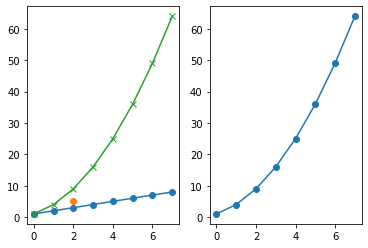

In [4]:
plt.figure();
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
linear_data = np.array([1,2,3,4,5,6,7,8]);
exponential_data = linear_data**2 


#Subplot 1
plt.subplot(1, 2, 1);
plt.plot(linear_data, '-o');
plt.plot(2,5,'o')


# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
# Segundo subplot
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

# Regresamos al primer subplot y graficamos el exponencial
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')
plt.show();

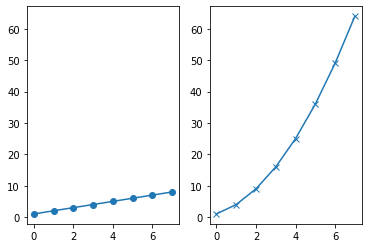

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

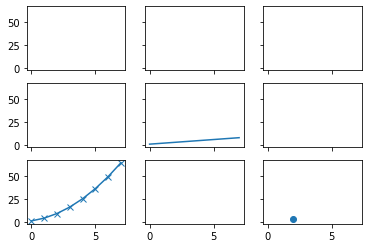

In [6]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,
                3, sharex=True, sharey=True)

# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')
ax7.plot(exponential_data, '-x')
ax9.plot(2,3,'o')

## HIstogram

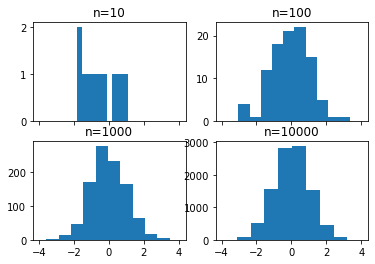

In [7]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples 
#from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))
# by default, the histogram uses 10 bins

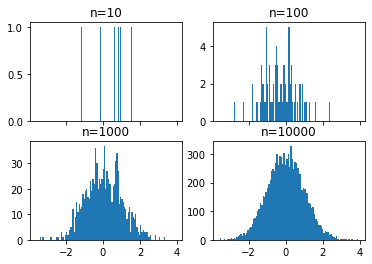

In [8]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

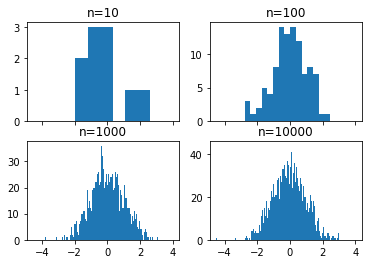

In [9]:
# better change the amount of bins depending on the sample size
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=10**(n)+5)
    axs[n].set_title('n={}'.format(sample_size))

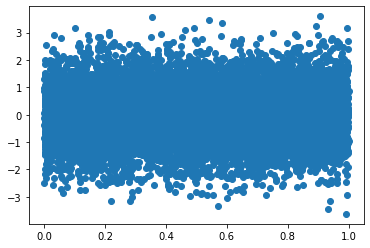

In [10]:
#

plt.figure()
# y values are normal
#x values are uniform random
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

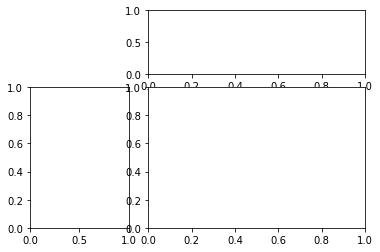

In [11]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
# create a space of dimensions 3*3
gspec = gridspec.GridSpec(3, 3)

# ad a plot on the top, that occupies the coordinates (0,1), (0,2)
top_histogram = plt.subplot(gspec[0, 1:])
#similarly for side
side_histogram = plt.subplot(gspec[1:, 0])

#and lower
lower_right = plt.subplot(gspec[1:, 1:])

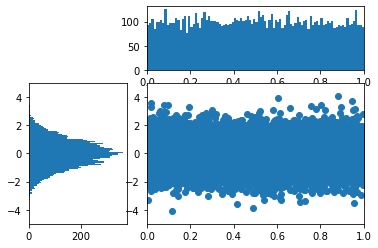

In [12]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
# create a space of dimensions 3*3
gspec = gridspec.GridSpec(3, 3)

# ad a plot on the top, that occupies the coordinates (0,1), (0,2)
top_histogram = plt.subplot(gspec[0, 1:])
#similarly for side
side_histogram = plt.subplot(gspec[1:, 0])

#and lower
lower_right = plt.subplot(gspec[1:, 1:])




#add stuff

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
#rotate the layout
s = side_histogram.hist(Y, bins=100, orientation='horizontal')


# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

## Box and whisker plot

In [15]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df

,normal,random,gamma
0,1.168668,0.690491,2.222762
1,1.676774,0.253606,0.674948
2,-0.554876,0.333046,2.302268
3,1.137401,0.451439,1.334246
4,-0.575329,0.434965,1.743637
...,...,...,...
9995,-0.640304,0.441897,2.898994
9996,-0.748675,0.855408,0.442343
9997,-0.530499,0.998816,0.631996
9998,-1.256798,0.253310,2.564248


In [14]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.003436,0.494696,1.987303
std,0.999902,0.288563,1.424878
min,-3.493651,0.000011,0.012660
25%,-0.669104,0.244608,0.940599
50%,-0.004459,0.490839,1.666569
75%,0.676688,0.745467,2.674089
max,3.942307,0.999792,15.002139


c:\users\tbasi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  after removing the cwd from sys.path.
c:\users\tbasi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  if __name__ == '__main__':


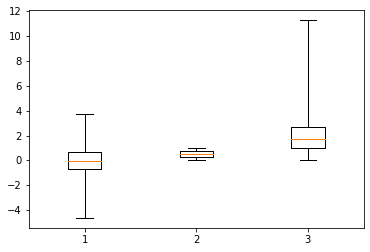

In [16]:
plt.figure()
# create a boxplot of the normal data, assign the 
# output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

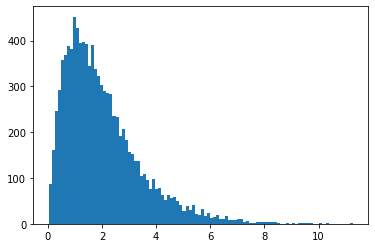

In [17]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

c:\users\tbasi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  after removing the cwd from sys.path.


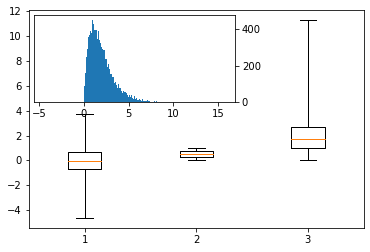

In [18]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

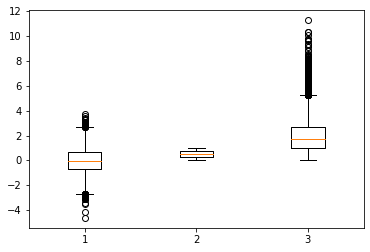

In [19]:
# if `whis` argument isn't passed, boxplot defaults 
# to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

## Heatmaps

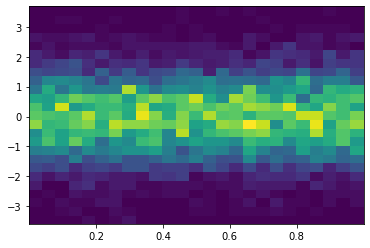

In [20]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

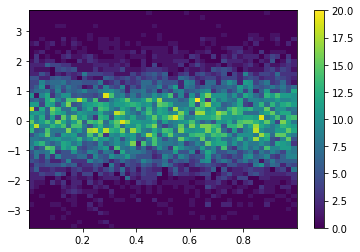

In [21]:
plt.figure()
_ = plt.hist2d(X, Y, bins=50)
# add a colorbar legend
plt.colorbar()

## Animations

In [22]:
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

n = 100
x = np.random.randn(n)

In [23]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [0,30])

<IPython.core.display.Javascript object>


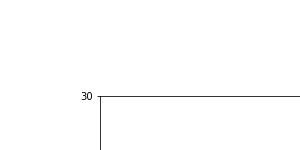

In [24]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

<IPython.core.display.Javascript object>


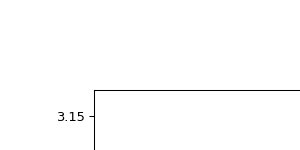

In [17]:
plt.plot(2,3)

# Interactivity

<IPython.core.display.Javascript object>


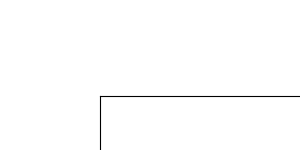

9

In [18]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [21]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.399425,0.869825,Brazil
1,0.141189,0.606035,Chile
2,0.115716,0.538656,India
3,0.445164,0.338607,Iraq
4,0.644848,0.217012,Mexico
5,0.871911,0.812433,UK
6,0.394134,0.473911,USA
7,0.601963,0.111605,Germany
8,0.604615,0.477958,Canada
9,0.986828,0.587089,China


<IPython.core.display.Javascript object>


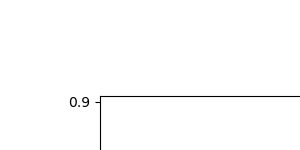

Text(0.5, 0, 'Height')

In [22]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [28]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

11